<a href="https://colab.research.google.com/github/gursimranWadhwa/Dry-beans-Classification/blob/main/IBM312_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bioinfokit

In [ ]:
from sklearn import preprocessing, svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from bioinfokit.visuz import cluster
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.stats import randint, loguniform

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Dry_Beans_Dataset.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.shape

(13611, 17)

In [ ]:
labels = df.Class.unique()
labels

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

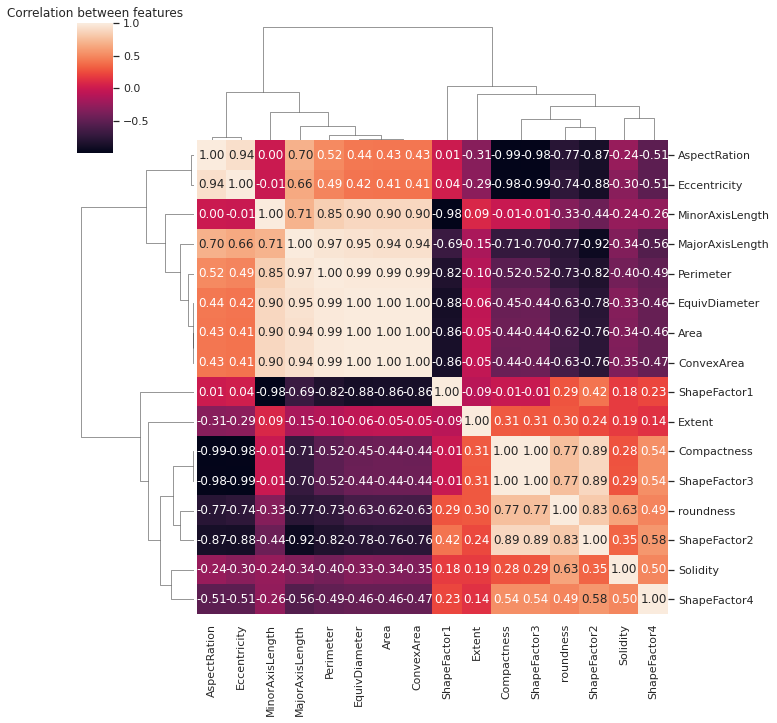

In [ ]:
X = df.drop("Class", axis=1)
Y = df['Class']
# Visualizing the correlation between the features
corr_matrix = df_train.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation between features")
plt.show()

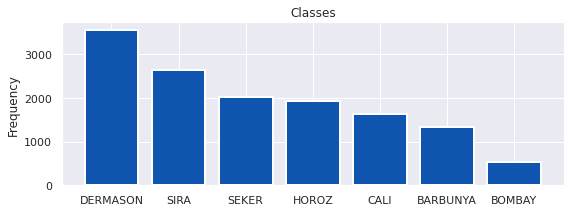

In [ ]:
# Bar Chart to visualize the labels in the output variable
sns.set()
var = df['Class']
varValue = var.value_counts()
plt.figure(figsize=(9,3))
plt.bar(varValue.index, varValue, color= "#1055b0", linewidth="2")
plt.xticks(varValue.index, varValue.index.values)
plt.ylabel("Frequency")
plt.title('Classes')
plt.show()

In [ ]:
# Convert Class String labels into Integers
lab_enc = preprocessing.LabelEncoder()
label_Y = lab_enc.fit_transform(Y)
# Normalize the input features of the dataset
normalizer = preprocessing.StandardScaler()
norm_X = normalizer.fit_transform(X)

In [ ]:
# Visualizing the Principal Components in the feature space
pca = PCA()
pca.fit(norm_X)
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in list(range(1, num_pc + 1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')

Total variance covered taking  1 Most dominant eigenvectors :  0.5546643861267669
Total variance covered taking  2 Most dominant eigenvectors :  0.8189741179133915
Total variance covered taking  3 Most dominant eigenvectors :  0.899039760198745
Total variance covered taking  4 Most dominant eigenvectors :  0.950180563039863
Total variance covered taking  5 Most dominant eigenvectors :  0.9775734920568954
Total variance covered taking  6 Most dominant eigenvectors :  0.9890711014604846
Total variance covered taking  7 Most dominant eigenvectors :  0.9960476088161605
Total variance covered taking  8 Most dominant eigenvectors :  0.9992984338041777
Total variance covered taking  9 Most dominant eigenvectors :  0.9998147001676273
Total variance covered taking  10 Most dominant eigenvectors :  0.9999055682893362
Total variance covered taking  11 Most dominant eigenvectors :  0.9999714550823996
Total variance covered taking  12 Most dominant eigenvectors :  0.9999898290123473
Total variance 

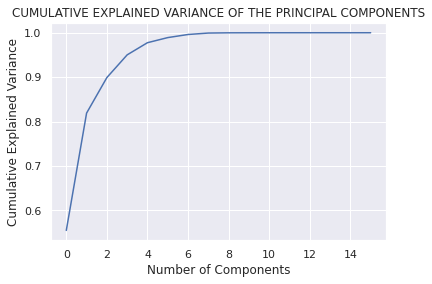

In [ ]:
# Screeplot of Principal Components
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_])
# 2D Bi-plot of Principal Components
pca_scores = PCA().fit_transform(norm_X)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=train_X.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2), 
               colorlist=train_Y)
# Cumulative Explained Variance Plot
score = 0
for i in range(0,15):
  score = score + pca.explained_variance_ratio_[i]
  print("Total variance covered taking ", (i+1), "Most dominant eigenvectors : ", score)
plt.plot(np.cumsum(pca.explained_variance_ratio_)); 
plt.title('CUMULATIVE EXPLAINED VARIANCE OF THE PRINCIPAL COMPONENTS')
plt.xlabel('Number of Components'); 
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# function to create confusion matrix heatmap view.
def plot2(y_true, y_pred):
    plt.figure(figsize=(15,8))
    column=[f'Predicted {label}' for label in labels]
    indices=[f'Actual {label}' for label in labels]
    table=pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=indices)
    return sns.heatmap(table,  fmt='d', cmap='viridis',
                 annot = True, square=True)

In [ ]:
def training_model_metrics(model, X, Y):
    train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=12, shuffle=True)
    model.fit(train_X, train_Y)
    y_pred = model.predict(test_X)
    model_acc = metrics.accuracy_score(test_Y, y_pred)
    f1_measure = metrics.f1_score(test_Y, y_pred, average='macro')
    model_precision = metrics.precision_score(test_Y, y_pred, average='macro')
    model_recall = metrics.recall_score(test_Y, y_pred, average='macro')
    print('Accuracy: %.3f, f1 measure: %.3f, precision: %.3f, recall: %.3f' % (model_acc, f1_measure, model_precision, model_recall))
    plot2(test_Y, model.predict(test_X));
    plt.show()

Performance metrics for Random Forest Classification of Original Data
Performance Metrics for ML Model of Dataset using default hyper-parameters
Accuracy: 0.931, f1 measure: 0.943, precision: 0.943, recall: 0.942


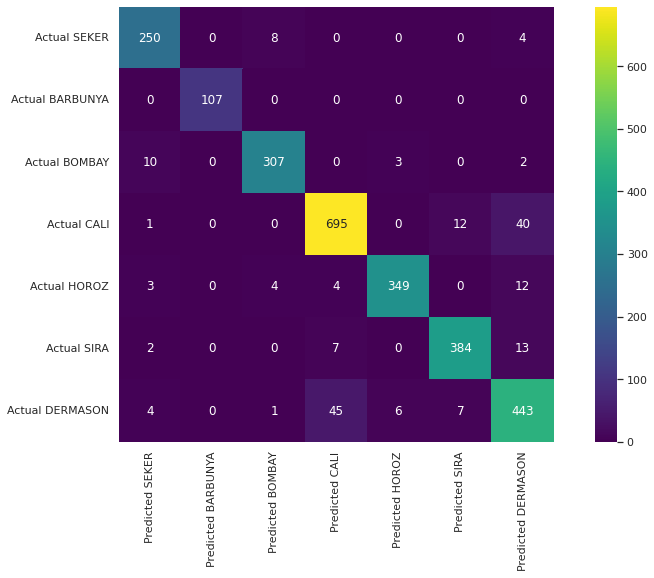

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
print('Performance metrics for Random Forest Classification of Original Data')
print('Performance Metrics for ML Model of Dataset using default hyper-parameters')
training_model_metrics(svc_model, norm_X, label_Y)

In [ ]:
rf_model = RandomForestClassifier(random_state=12)
print('Performance metrics for Random Forest Classification of Original Data')
print('Performance Metrics for ML Model of Dataset using default hyper-parameters')
training_model_metrics(rf_model, norm_X, label_Y)

Performance metrics for Random Forest Classification of Original Data
Performance Metrics for ML Model of Dataset using default hyper-parameters


In [ ]:
# Applying SMOTE technique on the dataset
sm = SMOTE(random_state=12)
X_sm, Y_sm = sm.fit_resample(norm_X, label_Y)
# Bar Chart to visualize the labels in the output variable in the SMOTE Balanced Dataset
Y_balanced = lab_enc.inverse_transform(Y_sm)
Y_balanced = pd.Index(Y_balanced, name='Class')
var = Y_balanced
varValue = var.value_counts()
plt.figure(figsize=(9, 3))
plt.bar(varValue.index, varValue,
        color= "blue", edgecolor="yellow",
        linewidth="2");plt.xticks(varValue.index,
                                  varValue.index.values)
plt.ylabel("Frequency")
plt.title('Class')
plt.show()

In [ ]:
print('Performance metrics for SVC of SMOTE Balanced Data')
print('Performance Metrics for ML Model of Dataset after SMOTE')
training_model_metrics(svc_model, X_sm, Y_sm)

In [ ]:
print('Performance metrics for Random Forest Classification of SMOTE Balanced Data')
print('Performance Metrics for ML Model of Dataset after SMOTE')
training_model_metrics(rf_model, X_sm, Y_sm)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline_deep = Pipeline([
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler()),
                    ('pca', PCA(n_components=0.99))
                        ])

In [ ]:
# PCA Dimensionality Reduction to 7 PCs
pca_rfsm = num_pipeline_deep.fit_transform(X_sm)
pca_test = num_pipeline_deep.transform(norm_X_test)

In [ ]:
print('Performance metrics for SVC of Original Data')
print('Performance Metrics for ML Model of Dataset after PCA')
training_model_metrics(svc_model, pca_rfsm, Y_sm)

In [ ]:
# PCA Dimensionality Reduction to 7 PCs
pca_rfsm = num_pipeline_deep.fit_transform(X_sm)
pca_test = num_pipeline_deep.transform(norm_X_test)
print('Performance metrics for Random Forest Classification of Original Data')
print('Performance Metrics for ML Model of Dataset after PCA')
training_model_metrics(rf_model, pca_rfsm, Y_sm)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(pca_rfsm, Y_sm, test_size=0.2, random_state=50)

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
import random
random.seed(19115087+19115083+19115057)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(8,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopp = EarlyStopping(patience=6, restore_best_weights=True, monitor='val_loss')
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)

In [ ]:
model.evaluate(X_val, y_val)

In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss)+1)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))
fig.tight_layout(pad=4)  #to avoid overlaping of titles in subplots
plt.sca(ax[0])
plt.plot(epochs, train_loss, 'bo-', label='training')
plt.plot(epochs, val_loss, 'go--', label='validating')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title('Training& ValidatingLoss')
plt.legend()

plt.sca(ax[1])
plt.plot(epochs, train_acc, 'bo-', label='training')
plt.plot(epochs, val_acc, 'go--', label='validating')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training & Validating Accuracy')

plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
nums_predictions = np.argmax(model.predict(X_val), axis=-1)
print(" F1 Score is : ",f1_score(nums_predictions, y_val,average="micro"))